In [104]:
import pandas as pd
import os
import seaborn as sns
import numpy as np
import nltk     
import re
from sklearn.feature_extraction.text import CountVectorizer
import graphviz 
from sklearn import tree
from sklearn import metrics
from wordcloud import WordCloud
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
import time


DATA_DIR = os.path.join( '..', 'data')

PROCESSED_DATA_DIR = os.path.join(DATA_DIR, 'processed')

In [105]:
#read sms_test and sms_train data and sms_val data
X_test = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, 'sms_test.csv'))
y_test=X_test['Label']
X_test.drop(['Label'],axis=1,inplace=True)
X_train = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, 'sms_train.csv'))
y_train=X_train['Label']
X_train.drop(['Label'],axis=1,inplace=True)
X_val = pd.read_csv(os.path.join(PROCESSED_DATA_DIR, 'sms_val.csv'))
y_val=X_val['Label']
X_val.drop(['Label'],axis=1,inplace=True)

In [106]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Registra el tiempo actual antes de ejecutar el código
    inicio = time.time()

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Obtener las probabilidades para el conjunto de prueba y el conjunto de entrenamiento
    y_probs_train = model.predict_proba(X_train)[:, 1]
    y_probs_test = model.predict_proba(X_test)[:, 1]

    # Calcular la curva ROC y el AUC para ambos conjuntos
    fpr_train, tpr_train, _ = roc_curve(y_train, y_probs_train)
    roc_auc_train = roc_auc_score(y_train, y_probs_train)

    fpr_test, tpr_test, _ = roc_curve(y_test, y_probs_test)
    roc_auc_test = roc_auc_score(y_test, y_probs_test)

    # Mostrar la curva ROC para el conjunto de entrenamiento y prueba
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (AUC = {roc_auc_train:.2f})')
    plt.plot(fpr_test, tpr_test, color='orange', lw=2, label=f'Test ROC curve (AUC = {roc_auc_test:.2f})')
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    # Mostrar resultados finales
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    # Imprimir los resultados
    print(f'f1_score: {f1}')
    print('Confusion Matrix:')
    print(conf_matrix)
    print('Classification Report:')
    print(classification_rep)

    # Registra el tiempo después de que el proceso finalice
    fin = time.time()
    tiempo_transcurrido_segundos = fin - inicio
    print(f"El proceso tardó aproximadamente {tiempo_transcurrido_segundos:.2f} segundos.")
    # Imprimir el tiempo de entrenamiento con la biblioteca time
    print("Tiempo de entrenamiento: %s segundos" % (time.time() - inicio))

    return model, f1


# Regresion Logistica

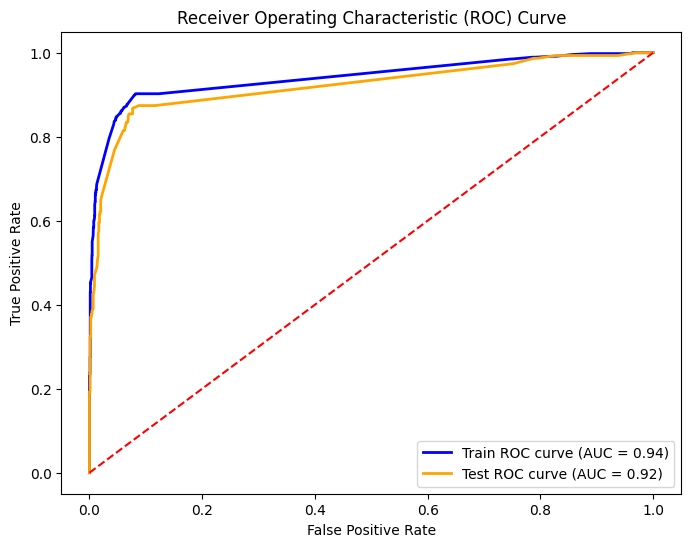

f1_score: 0.8349091608431078
Confusion Matrix:
[[886  16]
 [ 59  92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       902
           1       0.85      0.61      0.71       151

    accuracy                           0.93      1053
   macro avg       0.89      0.80      0.83      1053
weighted avg       0.93      0.93      0.92      1053

El proceso tardó aproximadamente 0.26 segundos.
Tiempo de entrenamiento: 0.25766491889953613 segundos


In [107]:
log_reg, f1_log_reg = evaluate_model(LogisticRegression(), X_train, X_test, y_train, y_test)



# Random Forest

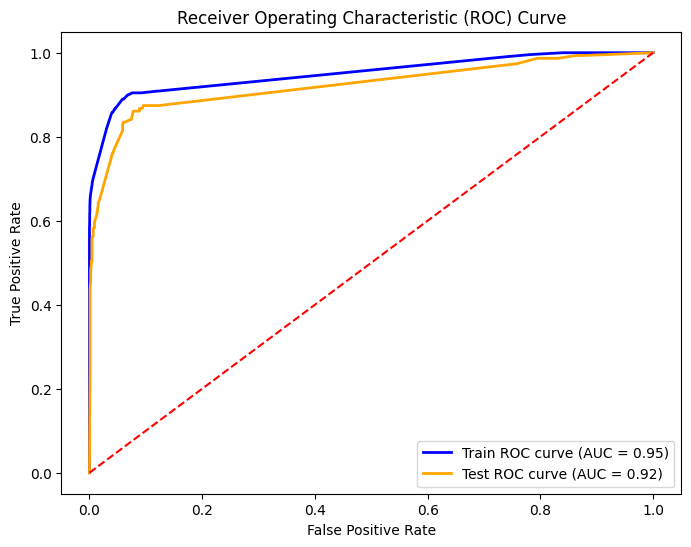

f1_score: 0.8481164279756592
Confusion Matrix:
[[889  13]
 [ 56  95]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       902
           1       0.88      0.63      0.73       151

    accuracy                           0.93      1053
   macro avg       0.91      0.81      0.85      1053
weighted avg       0.93      0.93      0.93      1053

El proceso tardó aproximadamente 0.49 segundos.
Tiempo de entrenamiento: 0.4864335060119629 segundos


In [108]:

rand_for,f1_rand_for=evaluate_model(RandomForestClassifier(),X_train,X_test,y_train,y_test)

# Support Vector Machine

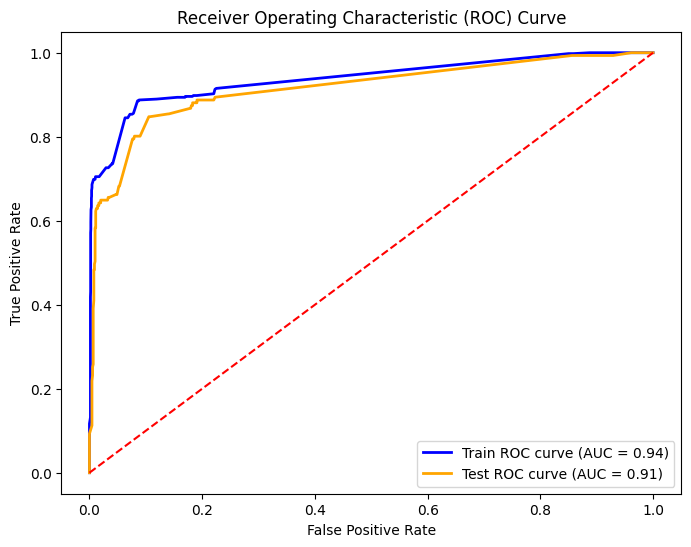

f1_score: 0.8474317365170307
Confusion Matrix:
[[887  15]
 [ 55  96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       902
           1       0.86      0.64      0.73       151

    accuracy                           0.93      1053
   macro avg       0.90      0.81      0.85      1053
weighted avg       0.93      0.93      0.93      1053

El proceso tardó aproximadamente 0.98 segundos.
Tiempo de entrenamiento: 0.9776167869567871 segundos


In [109]:
sup_vec, f1_sup_vec = evaluate_model(SVC(probability=True), X_train, X_test, y_train, y_test)


# XG Boost

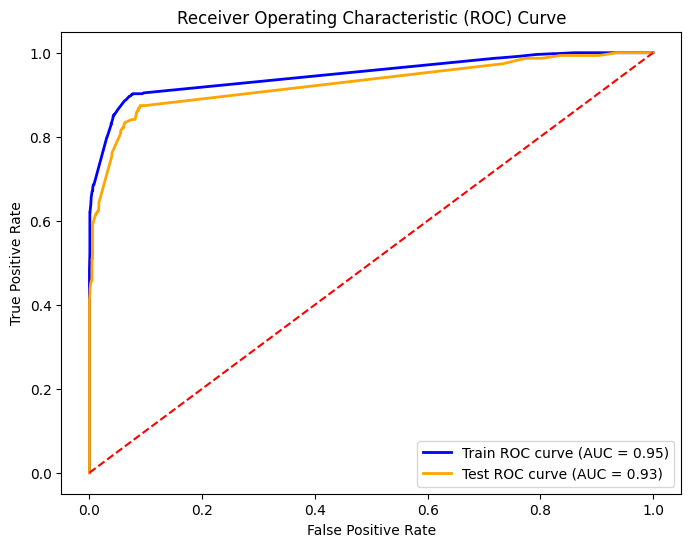

f1_score: 0.8474317365170307
Confusion Matrix:
[[887  15]
 [ 55  96]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       902
           1       0.86      0.64      0.73       151

    accuracy                           0.93      1053
   macro avg       0.90      0.81      0.85      1053
weighted avg       0.93      0.93      0.93      1053

El proceso tardó aproximadamente 0.26 segundos.
Tiempo de entrenamiento: 0.2577476501464844 segundos


In [110]:
xg_boost,f1_xg_boost=evaluate_model(XGBClassifier(),X_train,X_test,y_train,y_test)

# Multinominal Naive Bayes

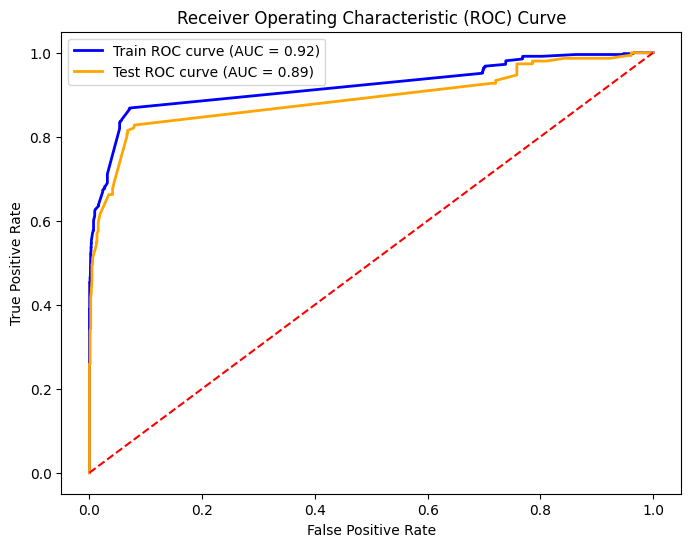

f1_score: 0.8246491620764155
Confusion Matrix:
[[890  12]
 [ 65  86]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       902
           1       0.88      0.57      0.69       151

    accuracy                           0.93      1053
   macro avg       0.90      0.78      0.82      1053
weighted avg       0.92      0.93      0.92      1053

El proceso tardó aproximadamente 0.16 segundos.
Tiempo de entrenamiento: 0.1636791229248047 segundos


In [111]:
mul_nom,f1_mul_nom=evaluate_model(MultinomialNB(),X_train,X_test,y_train,y_test)

# Decision Tree


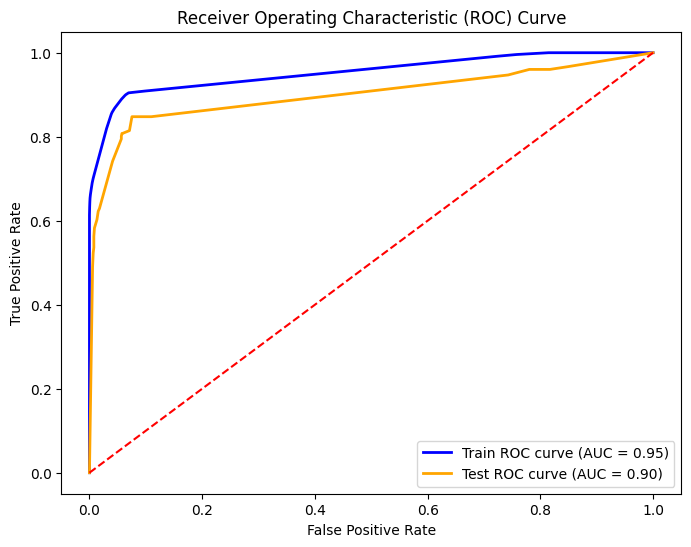

f1_score: 0.838829271611027
Confusion Matrix:
[[890  12]
 [ 60  91]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       902
           1       0.88      0.60      0.72       151

    accuracy                           0.93      1053
   macro avg       0.91      0.79      0.84      1053
weighted avg       0.93      0.93      0.93      1053

El proceso tardó aproximadamente 0.17 segundos.
Tiempo de entrenamiento: 0.16713786125183105 segundos


In [112]:
dec_tree,f1_dec_tree=evaluate_model(DecisionTreeClassifier(),X_train,X_test,y_train,y_test)

# Ada Boost

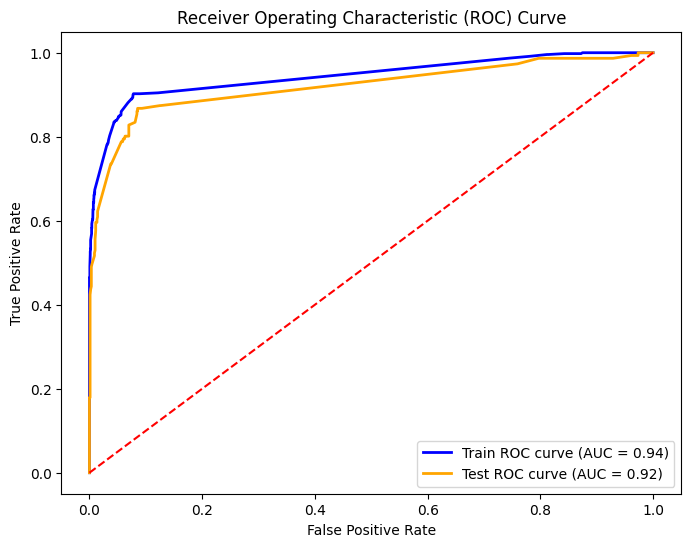

f1_score: 0.8399155405405405
Confusion Matrix:
[[889  13]
 [ 59  92]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       902
           1       0.88      0.61      0.72       151

    accuracy                           0.93      1053
   macro avg       0.91      0.80      0.84      1053
weighted avg       0.93      0.93      0.93      1053

El proceso tardó aproximadamente 0.30 segundos.
Tiempo de entrenamiento: 0.29828691482543945 segundos


In [113]:
ada_boost,f1_ada_boost=evaluate_model(AdaBoostClassifier(),X_train,X_test,y_train,y_test)

In [114]:
#create a new dataframe of f1 scores
f1_scores = pd.DataFrame({'Model':['Logistic Regression','Random Forest','Support Vector','XGBoost','MultinomialNB','Decision Tree','AdaBoost'],
                          'F1 Score':[f1_log_reg,f1_rand_for,f1_sup_vec,f1_xg_boost,f1_mul_nom,f1_dec_tree,f1_ada_boost]})
#sort the dataframe
f1_scores.sort_values(by='F1 Score',ascending=False,inplace=True)
print(f1_scores)


                 Model  F1 Score
1        Random Forest  0.848116
2       Support Vector  0.847432
3              XGBoost  0.847432
6             AdaBoost  0.839916
5        Decision Tree  0.838829
0  Logistic Regression  0.834909
4        MultinomialNB  0.824649


In [115]:
#create a new dataframe with accuracy scores

accuracy_scores = pd.DataFrame({'Model':['Logistic Regression','Random Forest','Support Vector','XGBoost','MultinomialNB','Decision Tree','AdaBoost']})

#add accuracy scores to the dataframe
accuracy_scores['Accuracy Score'] = [accuracy_score(y_test,log_reg.predict(X_test)),
                                     accuracy_score(y_test,rand_for.predict(X_test)),
                                     accuracy_score(y_test,sup_vec.predict(X_test)),
                                     accuracy_score(y_test,xg_boost.predict(X_test)),
                                     accuracy_score(y_test,mul_nom.predict(X_test)),
                                     accuracy_score(y_test,dec_tree.predict(X_test)),
                                     accuracy_score(y_test,ada_boost.predict(X_test))]
#sort the dataframe
accuracy_scores.sort_values(by='Accuracy Score',ascending=False,inplace=True)
print(accuracy_scores)


                 Model  Accuracy Score
1        Random Forest        0.934473
2       Support Vector        0.933523
3              XGBoost        0.933523
5        Decision Tree        0.931624
6             AdaBoost        0.931624
0  Logistic Regression        0.928775
4        MultinomialNB        0.926876


In [116]:
#create a new dataframe with AUC scores
auc_scores = pd.DataFrame({'Model':['Logistic Regression','Random Forest','Support Vector','XGBoost','MultinomialNB','Decision Tree','AdaBoost']})

#add AUC scores to the dataframe

auc_scores['AUC Score'] = [roc_auc_score(y_test,log_reg.predict_proba(X_test)[:,1]),
                            roc_auc_score(y_test,rand_for.predict_proba(X_test)[:,1]),
                            roc_auc_score(y_test,sup_vec.predict_proba(X_test)[:,1]),
                            roc_auc_score(y_test,xg_boost.predict_proba(X_test)[:,1]),
                            roc_auc_score(y_test,mul_nom.predict_proba(X_test)[:,1]),
                            roc_auc_score(y_test,dec_tree.predict_proba(X_test)[:,1]),
                            roc_auc_score(y_test,ada_boost.predict_proba(X_test)[:,1])]
#sort the dataframe
auc_scores.sort_values(by='AUC Score',ascending=False,inplace=True)
print(auc_scores)


                 Model  AUC Score
3              XGBoost   0.925416
1        Random Forest   0.922204
0  Logistic Regression   0.920882
6             AdaBoost   0.919076
2       Support Vector   0.914106
5        Decision Tree   0.899293
4        MultinomialNB   0.890266


In [117]:
#crate a new dataframe with the f1 scores, accuracy scores and AUC scores and tiempo de entrenamiento
final_scores = pd.DataFrame({'Model':['Logistic Regression','Random Forest','Support Vector','XGBoost','MultinomialNB','Decision Tree','AdaBoost']})

#add f1 scores, accuracy scores and AUC scores to the dataframe
final_scores['F1 Score'] = [f1_log_reg,f1_rand_for,f1_sup_vec,f1_xg_boost,f1_mul_nom,f1_dec_tree,f1_ada_boost]
final_scores['Accuracy Score'] = [accuracy_score(y_test,log_reg.predict(X_test)),
                                     accuracy_score(y_test,rand_for.predict(X_test)),
                                     accuracy_score(y_test,sup_vec.predict(X_test)),
                                     accuracy_score(y_test,xg_boost.predict(X_test)),
                                     accuracy_score(y_test,mul_nom.predict(X_test)),
                                     accuracy_score(y_test,dec_tree.predict(X_test)),
                                     accuracy_score(y_test,ada_boost.predict(X_test))]

final_scores['AUC Score'] = [roc_auc_score(y_test,log_reg.predict_proba(X_test)[:,1]),

                            roc_auc_score(y_test,rand_for.predict_proba(X_test)[:,1]),
                            roc_auc_score(y_test,sup_vec.predict_proba(X_test)[:,1]),
                            roc_auc_score(y_test,xg_boost.predict_proba(X_test)[:,1]),
                            roc_auc_score(y_test,mul_nom.predict_proba(X_test)[:,1]),
                            roc_auc_score(y_test,dec_tree.predict_proba(X_test)[:,1]),
                            roc_auc_score(y_test,ada_boost.predict_proba(X_test)[:,1])]
#sort the dataframe
final_scores.sort_values(by='F1 Score',ascending=False,inplace=True)
print(final_scores)



                 Model  F1 Score  Accuracy Score  AUC Score
1        Random Forest  0.848116        0.934473   0.922204
2       Support Vector  0.847432        0.933523   0.914106
3              XGBoost  0.847432        0.933523   0.925416
6             AdaBoost  0.839916        0.931624   0.919076
5        Decision Tree  0.838829        0.931624   0.899293
0  Logistic Regression  0.834909        0.928775   0.920882
4        MultinomialNB  0.824649        0.926876   0.890266


## Save the model

In [118]:
# Serialize a Model and browse the file in models folde


import pickle
pickle.dump(xg_boost, open("xgb_app.dat", "wb")) 
print("Saved model to: xgb_app.dat")


Saved model to: xgb_app.dat


In [119]:
loaded_model = pickle.load(open("xgb_app.dat", "rb")) 
print("Loaded model from: xgb_app.dat")

Loaded model from: xgb_app.dat


In [120]:
y_loaded_pred = loaded_model.predict(X_test) 

In [121]:
print(classification_report(y_test,y_loaded_pred)) 

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       902
           1       0.86      0.64      0.73       151

    accuracy                           0.93      1053
   macro avg       0.90      0.81      0.85      1053
weighted avg       0.93      0.93      0.93      1053

